In [3]:
#Pkg.clone("https://github.com/pjabardo/Jacobi.jl")
#Pkg.add("Formatting")
#Pkg.add("DataFrames")
using DataFrames
using Formatting
using PyPlot
using Jacobi

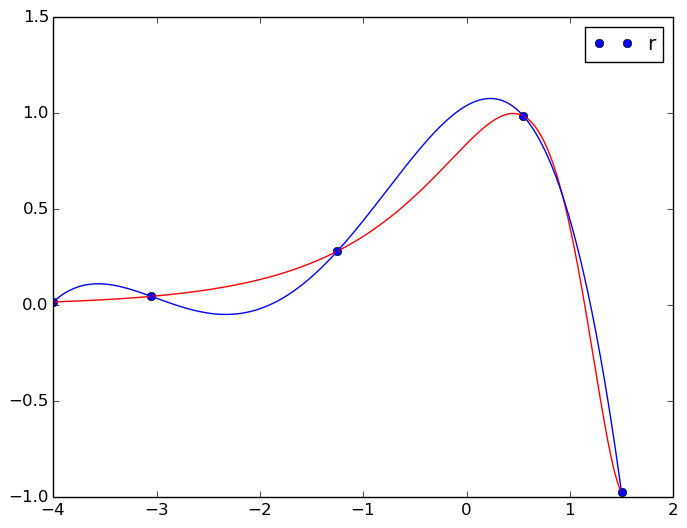

In [3]:
###############
# interpolação#
##############
#intervalo 
a = -4; b = 1.5

Q = 5
z = zglj(Q)
nx = 1000
x = linspace(-1, 1, nx)
#altera o intervalo de interpolação
z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
#estabelece as funções
ye = sin(exp(z))
ye2 = sin(exp(x))
#interpola os pontos por polinômios de lagrange
Im = interp_mat(x, z)
y = Im * ye
plot(z, ye, "o",label = "zeros")
plot(x, ye2, "r-",label = "original")
plot(x, y, "b-",label = "aprox")
legend("r")
println("  ")
println("error = ", maxabs(y-ye2))

error = 0.23225938060325235
  


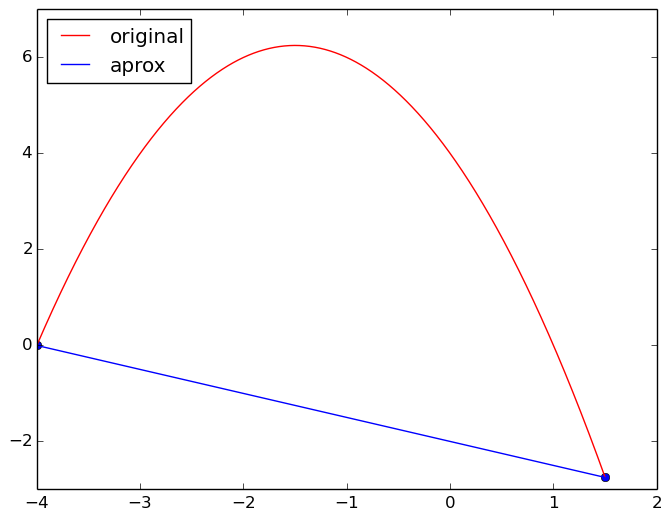

error = 7.562492422352284


In [4]:
###############
# interpolação#
##############
#intervalo 
a = -4; b = 1.5
func(x) = -x.^2 - 3.*x + 4
Q = 2
z = zglj(Q)
nx = 1000
x = linspace(-1, 1, nx)
#altera o intervalo de interpolação
z =((1-z)/(2)).*a + ((1+z)/(2)).*b
x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
#estabelece as funções
ye = func(z)
ye2 = func(x)
#interpola os pontos por polinômios de lagrange
Im = interp_mat(x, z)
y = Im * ye
plot(z, ye, "o" )
plot(x, ye2, "r-",label = "original")
plot(x, y, "b-",label = "aprox")
legend(loc=2)
println("  ")
println("error = ", maxabs(y-ye2))

23

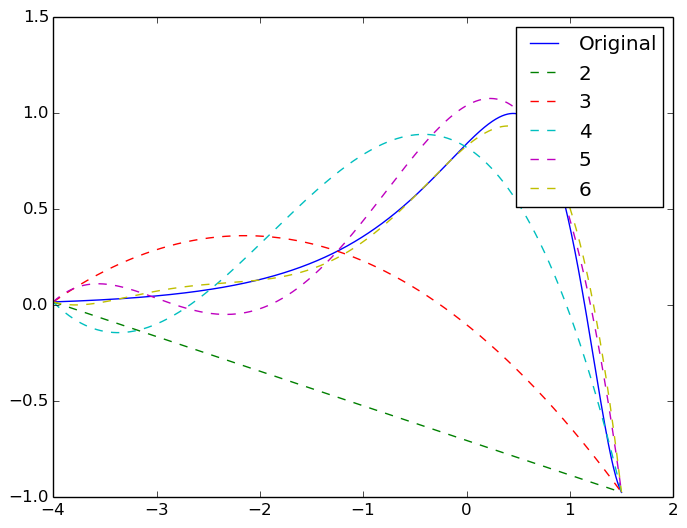

456

In [5]:
ye2 = sin(exp(x))
plot(x, ye2, "-",label="Original")
legend()
N = 6
for Q in 2:1:N
    print(Q)
    z = zglj(Q)
    nx = 1000
    x = linspace(-1, 1, nx)
    #altera o intervalo de interpolação
    z =((1-z)/(2)).*a + ((1+z)/(2)).*b
    x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
    #estabelece as funções
    ye = sin(exp(z))
    #interpola os pontos por polinômios de lagrange
    Im = interp_mat(x, z)
    y = Im * ye

    plot(x, y, "--",label = "$Q")
    legend()
end


## Fenômeno de Runge
Interpolação da função de runge:

# $ f(x) = \frac{1}{1 + 25x^2}$

  
erro para 2 = 0.9615
  
erro para 3 = 0.6462
  
erro para 4 = 0.7070
  
erro para 5 = 0.4383
  
erro para 6 = 0.4327
  
erro para 7 = 0.6169
  
erro para 8 = 0.2473
  
erro para 9 = 1.0452
  
erro para 10 = 0.3003
  
erro para 11 = 1.9156
  
erro para 12 = 0.5567
  
erro para 13 = 3.6629
  
erro para 14 = 1.0701
  
erro para 15 = 7.1923
  
erro para 16 = 2.1069
  
erro para 17 = 14.3868
  
erro para 18 = 4.2234
  
erro para 19 = 29.1862
  
erro para 20 = 8.5754
  
erro para 21 = 59.7684
  
erro para 22 = 17.6020
  
erro para 23 = 123.6181
  
erro para 24 = 36.3956
  
erro para 25 = 257.2125
  
erro para 26 = 75.7639
  
erro para 27 = 538.1716
  
erro para 28 = 158.6921
  
erro para 29 = 1130.7416
  
erro para 30 = 333.9417
  
erro para 31 = 2384.7286
  
erro para 32 = 704.0759
  
erro para 33 = 5058.9874
  
erro para 34 = 1494.3807
  
erro para 35 = 10719.9011
  
erro para 36 = 3170.7560
  
erro para 37 = 22897.9184
  
erro para 38 = 6771.8008
  
erro para 39 = 48841.0303
  


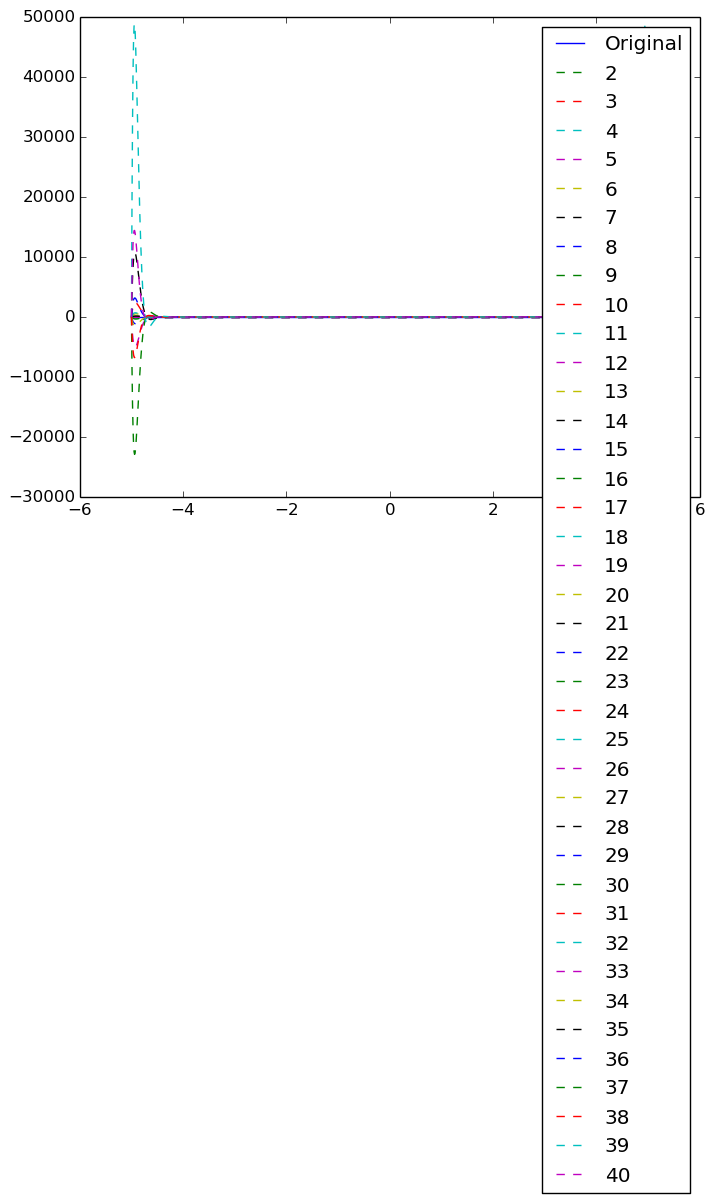

erro para 40 = 14426.5076


In [98]:

#intervalo 
a = -5 ; b = 5


f(x) = 1./(1 + x.^2)


nx = 1000
x2 = linspace(a, b, nx)
ye2 = f(x2)
plot(x2, ye2, "-",label="Original")
legend()
N = 40
l = 0.0
for Q in 2:1:N
    z = linspace(-1, 1, Q)
    nx= 1000
    x = linspace(-1, 1, nx)
    #altera o intervalo de interpolação
    z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
    x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
    #estabelece as funções
    ye = f(z)
    #interpola os pontos por polinômios de lagrange
    Im = interp_mat(x, z)
    y =  Im * ye
    plot(x, y, "--",label = "$Q")
    legend()
    println("  ")
    erro = format(maxabs(y-ye2), precision=4)
    l = [l maxabs(y-ye2)]
    println("erro para $Q = $erro")
end
 


In [142]:
df = DataFrame(l)
writetable("output.csv", df, separator = ',', header = true)

# Integração


Para $\xi \in [-1,1]$ podemos fazer a interpolação:

$\int_{-1}^{1} f(\xi )d\xi = \sum_{i=1}^{N} f(\xi)w_{i}(\xi)$

Para integrar a função no intervalo [a,b], fazemos $ x = \frac{1-\xi}{2}a + \frac{1+\xi}{2} b $

$\int_{-1}^{1} f(\xi )d\xi = \frac{b-a}{2}  \int_{a}^{b} f(x)dx = \frac{b-a}{2} \sum_{i=1}^{N} w_i f(\frac{1-\xi}{2}a + \frac{1+\xi}{2} b))$




In [ ]:
#integração
fun(x) = x.^2 - 2.*x +3
#intervalo [a,b]
a = -10; b = -3
z = zglj(Q, .0, 0.0)
w = wglj(z, 0.0, 0.0)
#transformação da z do intervalo [-1,1] para [a,b]
z =((1-z)/(2)).*a + ((1+z)/(2)).*b
f2 = fun(z)
Ix = (b-a)/2 .*sum(w .* f2)



In [ ]:
format(exp(2),precision=4)